In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import authentic_performance as ap
from scipy.stats import uniform, norm
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def power_law(x, a=1):
    return (1/x)**a

In [276]:
N = 100
P = 10/N
DISTRIBUTION = uniform
FRAUD_PROBABILITY = 0.9
FRAUDSTER_INDEX = round(N/2)
FRAUDSTER_STRENGTH = None  # or DISTRIBUTION.expect()

G = ap.generate_network(n=N, p=P, distribution=DISTRIBUTION,
                        strength_scheme=True, iterations=10000, decreasing_function=lambda u : power_law(u, 3),
                        fraud=False, fraudster_index=FRAUDSTER_INDEX, fraudster_strength=FRAUDSTER_STRENGTH, fraud_probability=FRAUD_PROBABILITY)
nx.set_node_attributes(G, {k:{"delta_degrees_in_out":v} for k, v in dict(pd.Series(dict(G.in_degree())) - pd.Series(dict(G.out_degree()))).items()})
nx.set_node_attributes(G, {k:{"pr":v} for k,v in nx.pagerank(G).items()})
nx.write_gexf(G, "gephi_viz/synthetic.gexf")

## Experiment 1
Fraudster is set to be at median strength ie half on nodes have an inferior strength and half of nodes have a superior one. The fraudster is allowed to pick a proportion of his opponents that he knows to be weaker.

### Fraudster vs delta degrees ratings

In [5]:
N = 100
DISTRIBUTION = uniform
P = 10/N
FRAUDSTER_INDEX = round(N/2)
FRAUDSTER_STRENGTH = None  # or DISTRIBUTION.expect()

list_fraud_probabilities = [round(x,2) for x in list(np.linspace(0,1,11))]
list_series_delta_degrees = []
for proba in list_fraud_probabilities:
    l = []
    for _ in range(1000):
        G = ap.generate_network(n=N, p=P, distribution=DISTRIBUTION, fraudster_index=FRAUDSTER_INDEX, fraudster_strength=FRAUDSTER_STRENGTH,
                                fraud_probability=proba)
        l.append(pd.Series(dict(pd.Series(dict(G.in_degree())) - pd.Series(dict(G.out_degree())))).sort_index())
    list_series_delta_degrees.append(pd.concat(l, axis=1).mean(axis=1).sort_index())

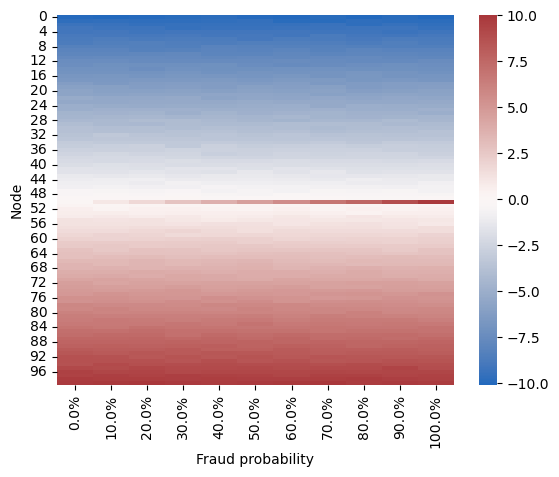

In [6]:
sns.heatmap(pd.concat(list_series_delta_degrees, axis=1).values,
            cmap=sns.color_palette("vlag", as_cmap=True),
            xticklabels=[f"{100*x}%" for x in list_fraud_probabilities]).set(xlabel='Fraud probability', ylabel='Node');

No handles with labels found to put in legend.


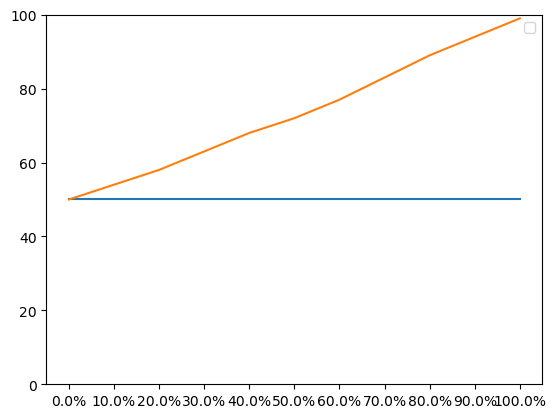

In [7]:
plt.plot([FRAUDSTER_INDEX for _ in list_series_delta_degrees])
plt.plot([np.nonzero(l.sort_values().index == FRAUDSTER_INDEX)[0][0] for l in list_series_delta_degrees])
plt.ylim([0,N])
plt.xticks(range(len(list_fraud_probabilities)), [f"{100*x}%" for x in list_fraud_probabilities])
plt.legend()

There is a linear relationship between the proportion of fraudulous links and the expected improvement of the rank which comes from the fact that the delta degree function is linear wrt the proportion of fraudulous links. Clearly the delta degree rating function is sensible to this kind of fraud.

### Fraudster vs PageRank ratings

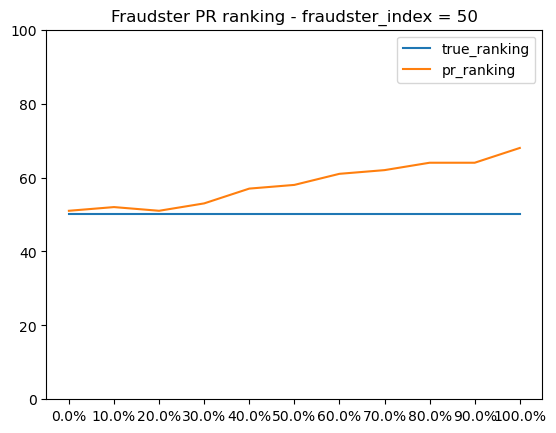

In [8]:
N = 100
DISTRIBUTION = uniform
P = 10/N
FRAUDSTER_INDEX = round(N/2)
FRAUDSTER_STRENGTH = None  # or DISTRIBUTION.expect()

list_fraud_probabilities = [round(x,2) for x in list(np.linspace(0,1,11))]
list_series_pr = []
for proba in list_fraud_probabilities:
    l = []
    for _ in range(100):
        G = ap.generate_network(n=N, p=P, distribution=DISTRIBUTION, fraudster_index=FRAUDSTER_INDEX, fraudster_strength=FRAUDSTER_STRENGTH,
                                fraud_probability=proba)
        l.append(pd.Series(nx.pagerank(G, alpha=0.85)).sort_index())
    list_series_pr.append(pd.concat(l, axis=1).mean(axis=1).sort_index())

plt.title(f"Fraudster PR ranking - fraudster_index = {FRAUDSTER_INDEX}")
plt.plot([FRAUDSTER_INDEX for _ in list_series_pr], label="true_ranking")
plt.plot([np.nonzero(l.sort_values().index == FRAUDSTER_INDEX)[0][0] for l in list_series_pr], label="pr_ranking")
plt.ylim([0,N])
plt.xticks(range(len(list_fraud_probabilities)), [f"{100*x}%" for x in list_fraud_probabilities])
plt.legend()

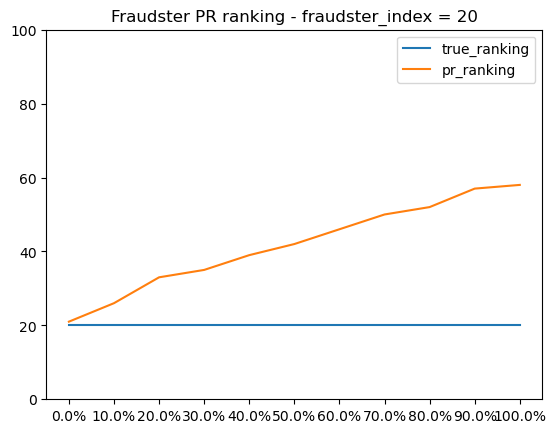

In [9]:
N = 100
DISTRIBUTION = uniform
P = 10/N
FRAUDSTER_INDEX = 20
FRAUDSTER_STRENGTH = None  # or DISTRIBUTION.expect()

list_fraud_probabilities = [round(x,2) for x in list(np.linspace(0,1,11))]
list_series_pr = []
for proba in list_fraud_probabilities:
    l = []
    for _ in range(100):
        G = ap.generate_network(n=N, p=P, distribution=DISTRIBUTION, fraudster_index=FRAUDSTER_INDEX, fraudster_strength=FRAUDSTER_STRENGTH,
                                fraud_probability=proba)
        l.append(pd.Series(nx.pagerank(G, alpha=0.85)).sort_index())
    list_series_pr.append(pd.concat(l, axis=1).mean(axis=1).sort_index())

plt.title(f"Fraudster PR ranking - fraudster_index = {FRAUDSTER_INDEX}")
plt.plot([FRAUDSTER_INDEX for _ in list_series_pr], label="true_ranking")
plt.plot([np.nonzero(l.sort_values().index == FRAUDSTER_INDEX)[0][0] for l in list_series_pr], label="pr_ranking")
plt.ylim([0,N])
plt.xticks(range(len(list_fraud_probabilities)), [f"{100*x}%" for x in list_fraud_probabilities])
plt.legend()

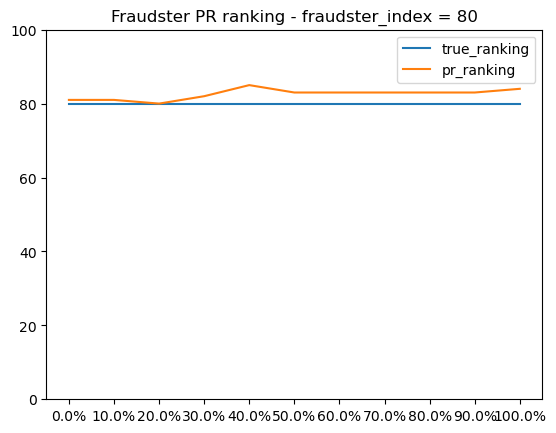

In [10]:
N = 100
DISTRIBUTION = uniform
P = 10/N
FRAUDSTER_INDEX = 80
FRAUDSTER_STRENGTH = None  # or DISTRIBUTION.expect()

list_fraud_probabilities = [round(x,2) for x in list(np.linspace(0,1,11))]
list_series_pr = []
for proba in list_fraud_probabilities:
    l = []
    for _ in range(100):
        G = ap.generate_network(n=N, p=P, distribution=DISTRIBUTION, fraudster_index=FRAUDSTER_INDEX, fraudster_strength=FRAUDSTER_STRENGTH,
                                fraud_probability=proba)
        l.append(pd.Series(nx.pagerank(G, alpha=0.85)).sort_index())
    list_series_pr.append(pd.concat(l, axis=1).mean(axis=1).sort_index())

plt.title(f"Fraudster PR ranking - fraudster_index = {FRAUDSTER_INDEX}")
plt.plot([FRAUDSTER_INDEX for _ in list_series_pr], label="true_ranking")
plt.plot([np.nonzero(l.sort_values().index == FRAUDSTER_INDEX)[0][0] for l in list_series_pr], label="pr_ranking")
plt.ylim([0,N])
plt.xticks(range(len(list_fraud_probabilities)), [f"{100*x}%" for x in list_fraud_probabilities])
plt.legend()

PageRank is not fooled as much as the delta degree rating function. However, we can remark that the fraud is bigger when the fraudster's true ranking is low. This can be explained by the fact that selecting opponents that are a lot weaker does not lift a PR much (ie the bigger the difference, the lower the rank increase).

# <>

In [277]:
ap.specify_fraudster(G, index=FRAUDSTER_INDEX, strength=None)
G.nodes[FRAUDSTER_INDEX]

{'strength': 0.4713722861956363,
 'fraud': True,
 'delta_degrees_in_out': 0,
 'pr': 0.011324704807362721}

In [ ]:
ap.generate_fraudstersEdges(G, n, strengths, fraud_probability=0.5)

In [282]:
nx.get_node_attributes(G,"strength")

{0: 0.006638241919843302,
 1: 0.011802239132006953,
 2: 0.014328862643639861,
 3: 0.018147730640472814,
 4: 0.02931738274136808,
 5: 0.03780731756667843,
 6: 0.059100343854405435,
 7: 0.06196987406417265,
 8: 0.06620368290478951,
 9: 0.08599761215317991,
 10: 0.09852728418528289,
 11: 0.10819161548564926,
 12: 0.11965021587985947,
 13: 0.12144223458242154,
 14: 0.13714497636940937,
 15: 0.1493144970636059,
 16: 0.16731981880051183,
 17: 0.17025314136687286,
 18: 0.1738142934703042,
 19: 0.1804017264216018,
 20: 0.18618981791861322,
 21: 0.18924698551303498,
 22: 0.19080641508727247,
 23: 0.19488813176139663,
 24: 0.19613426509262355,
 25: 0.19731232412006694,
 26: 0.19997398601217597,
 27: 0.2520470213347431,
 28: 0.26106130113923476,
 29: 0.2815398106428847,
 30: 0.28841936990240924,
 31: 0.28911400372629315,
 32: 0.2966626144934733,
 33: 0.30213363942836,
 34: 0.3036815461459347,
 35: 0.304014823405082,
 36: 0.31889496803843265,
 37: 0.32008890946737956,
 38: 0.3568165983617494,
 39:

In [274]:
nx.write_gexf(G, "gephi_viz/synthetic_strengthScheme.gexf")